# Statistische Verteilungen

## Diskrete Verteilungen

### Diskrete Gleichverteilung

### Bernoulli-Verteilung

Einfachste diskrete Verteilung

In [1]:
from scipy.stats import bernoulli
import numpy as np

p = 0.6
b  = bernoulli(p)

**Wahrscheinlichkeitsfunktion (probability mass function):**

$f(x) = p^{x}*(1-p)^{(1-x)}$, für $x = 0,1$

$f(x) = 0$, sonst

In [2]:
b.pmf(0), b.pmf(1)

(0.4, 0.6)

In [3]:
x = np.arange(-0.5, 2, 0.5)
bernoulli = np.array(b.pmf(x))

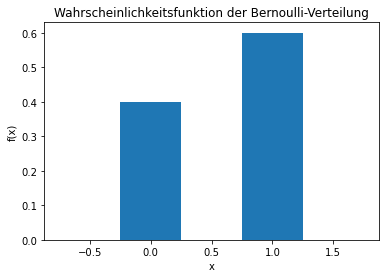

In [4]:
from matplotlib import pyplot as plt

plt.bar(x, bernoulli, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der Bernoulli-Verteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = p$

In [25]:
b.expect()

0.6

**Varianz:**

$Var(X)=p*(1-p)$

In [26]:
b.var()

0.24

**Standardabweichung:**

$\sigma = \sqrt{p*(1-p)}$

In [28]:
b.std()

0.4898979485566356

**Vereilungsfunktion (cumulative distribution function):**

$F_{X}(x) = P(X \le x)$

$F_{X}(x) = 0$, falls $x < 0$

$F_{X}(x) = 1-p$, falls $0 \le x \le 1$

$F_{X}(x) = 1$, falls $x \ge 1$

In [20]:
x = np.arange(-0.5, 2, 0.001)
bernoulli = np.array(b.cdf(x))

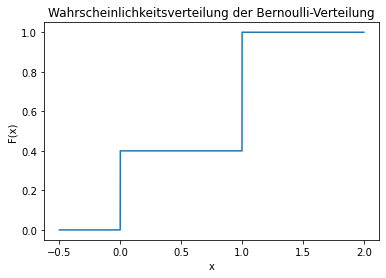

In [21]:
plt.plot(x, bernoulli)
plt.title("Verteilungsfunktion der Bernoulli-Verteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Binomial-Verteilung

**Wahrscheinlichkeitsfunktion:**

$B_{p,n}(k)= \binom{n}{k} p^{k}*(1-p)^{n-k} $, falls $ 0 \le k \le n$

$B_{p,n}(k) = 0$, sonst

In [29]:
from scipy.stats import binom

n = 10
p = 0.5

k = np.arange(0, 11)
bino = np.array(binom.pmf(k, n, p))

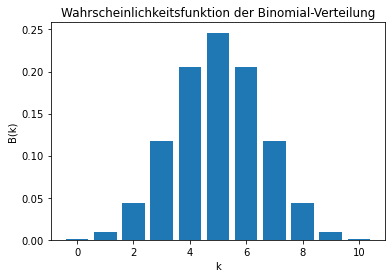

In [34]:
plt.bar(k, bino)
plt.title("Wahrscheinlichkeitsfunktion der Binomial-Verteilung")
plt.xlabel("k")
plt.ylabel("B(k)")
plt.show()

**Erwartungswert:**

$E(X) = n*p$

In [35]:
bino = binom(n, p)
bino.expect()

5.000000000000005

**Varianz:**

$Var(X) = n*p*(1-p)$

In [36]:
bino.var()

2.5

**Standardabweichung:**

$\sigma = \frac{\sqrt{n}}{2}$

In [37]:
bino.std()

1.5811388300841898

**Verteilungsfunktion:**

$F_{X}(x)= \sum_{k=0}^{|x|} \binom{n}{k}p^{k}*(1-p)^{n-k}$

In [38]:
k = np.arange(0, 11, 0.001)
bino = np.array(binom.cdf(k, n, p))

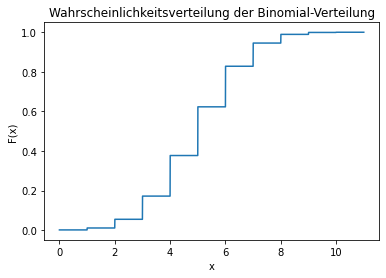

In [39]:
plt.plot(k, bino)
plt.title("Verteilungsfunktion der Binomial-Verteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()